INCOME DATASET

In [ ]:
import pandas as pd
df=pd.read_csv("/content/income.csv")
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income_level
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = df.drop('income_level', axis=1)
y = df['income_level']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Build AdaBoost Classifier with default n_estimators (10)
ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=10, random_state=42)

In [ ]:
y_pred_default = ada_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy with default n_estimators (10): {accuracy_default:.4f}")

Accuracy with default n_estimators (10): 0.8277


In [ ]:
best_accuracy = 0
best_n_estimators = 10

for n in range(10, 201, 10):
    ada_tuned = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada_tuned.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred_tuned = ada_tuned.predict(X_test)
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

    # Track the best accuracy and corresponding n_estimators
    if accuracy_tuned > best_accuracy:
        best_accuracy = accuracy_tuned
        best_n_estimators = n

print(f"Best accuracy: {best_accuracy:.4f} with n_estimators = {best_n_estimators}")

Best accuracy: 0.8312 with n_estimators = 160


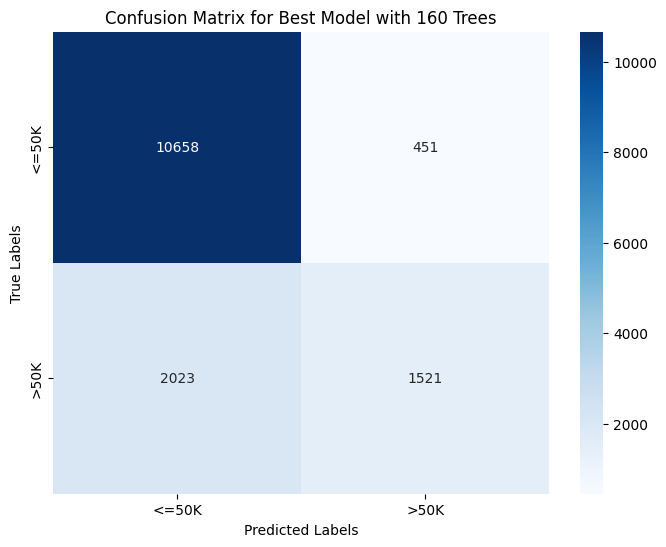

In [ ]:
ada_best = AdaBoostClassifier(n_estimators=best_n_estimators, random_state=42)
ada_best.fit(X_train, y_train)

y_pred_best = ada_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title(f"Confusion Matrix for Best Model with {best_n_estimators} Trees")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred_best, pos_label=1)
print(f"Precision (for >50K): {precision:.4f}")

recall = recall_score(y_test, y_pred_best, pos_label=1)
print(f"Recall (for >50K): {recall:.4f}")

f1 = f1_score(y_test, y_pred_best, pos_label=1)
print(f"F1-Score (for >50K): {f1:.4f}")

Accuracy: 0.8312
Precision (for >50K): 0.7713
Recall (for >50K): 0.4292
F1-Score (for >50K): 0.5515
